In [126]:
### data source: https://github.com/offensive-security/exploitdb

In [127]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
%matplotlib inline
import matplotlib.pyplot as plots
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
plots.style.use('fivethirtyeight')

In [128]:
exploits = pd.read_csv('files_exploits.csv')

In [129]:
exploits.head()
# exploits.shape

id                             file  \
0      9         exploits/windows/dos/9.c   
1  37060  exploits/windows/dos/37060.html   
2     11          exploits/linux/dos/11.c   
3     13        exploits/windows/dos/13.c   
4     17       exploits/windows/dos/17.pl   

                                        description        date  \
0                          Apache 2.x - Memory Leak  2003-04-09   
1  Microsoft Internet Explorer 11 - Crash (PoC) (1)  2015-05-19   
2  Apache 2.0.44 (Linux) - Remote Denial of Service  2003-04-11   
3             Chindi Server 1.0 - Denial of Service  2003-04-18   
4      Xeneo Web Server 2.2.9.0 - Denial of Service  2003-04-22   

           author type platform  port  
0  Matthew Murphy  dos  windows   NaN  
1  Garage4Hackers  dos  windows   NaN  
2  Daniel Nystram  dos    linux   NaN  
3     Luca Ercoli  dos  windows   NaN  
4      Tom Ferris  dos  windows   NaN

In [130]:
exploit_types = exploits['type'].unique().tolist()

In [131]:
exploit_types_freq = exploits.groupby('type').size().tolist()

In [132]:
fig = go.Figure(data=[go.Pie(labels=exploit_types, values=exploit_types_freq)])
fig.show()

In [133]:
platforms = exploits['platform'].unique().tolist()

In [134]:
exploits.groupby('type').platform.agg(['count', 'first'])

count    first
type                   
dos       6513  windows
local     4091    linux
remote    6961  windows
webapps  23964      php

In [226]:
print(exploits.shape)
combined_frame = exploits.groupby(['type','platform']).size().to_frame(name='total').reset_index()
print(combined_frame.shape)

(41529, 9)
(153, 3)


In [227]:
fig = px.scatter(combined_frame, y='total', x='platform',color='type',width=1200, height=1000)

In [228]:
fig = px.scatter(combined_frame[combined_frame['total'] < 5000], y='total', x='platform',color='type',width=1200, height=1000)

In [229]:
fig = px.scatter(combined_frame[combined_frame['total'] < 100], y='total', x='platform',color='type',width=1200, height=1000)
fig.show()

In [249]:
date_frame = exploits.groupby(['platform','date']).size().to_frame(name='total').reset_index()
date_frame['date'] = pd.to_datetime(date_frame['date']) ;
apple_frame = date_frame[date_frame.platform.str.contains('macos') | date_frame.platform.str.contains('osx')]
apple_frame.head()

platform       date  total
5508    macos 2016-10-31      1
5509    macos 2016-12-22      4
5510    macos 2017-01-16      1
5511    macos 2017-02-23      1
5512    macos 2017-02-24      1

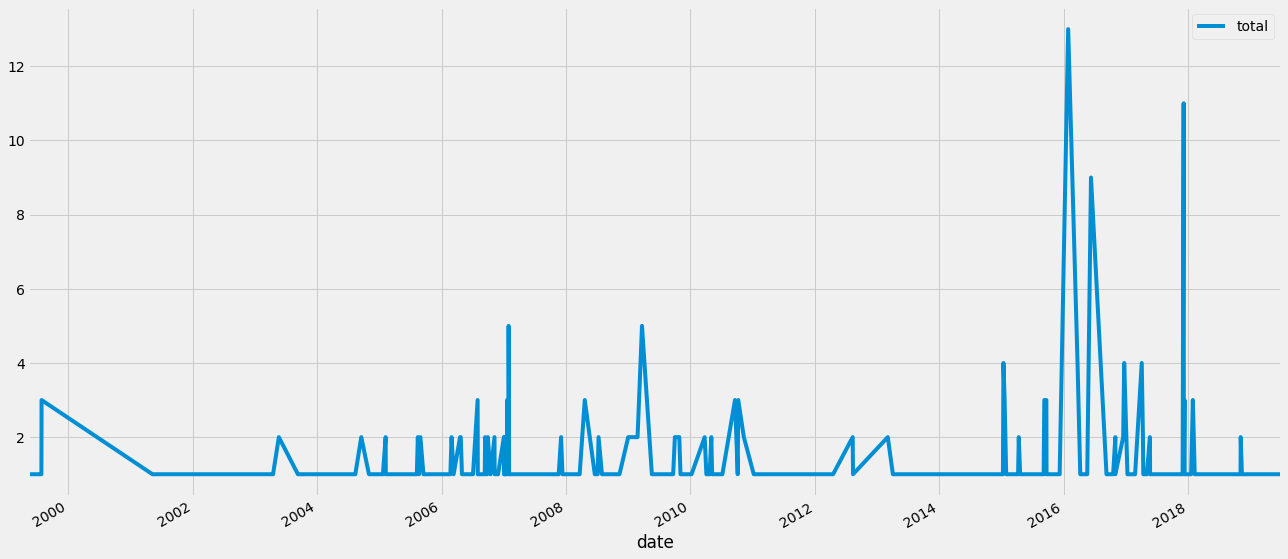

In [233]:

apple_frame.plot.line(x='date',y='total',figsize=(20,10));

In [234]:
windows_frame = date_frame[date_frame.platform.str.contains('windows')]
windows_frame.head()

platform       date  total
12377  windows 1995-10-30      1
12378  windows 1996-01-17      1
12379  windows 1996-03-01      1
12380  windows 1996-10-21      1
12381  windows 1997-01-06      1

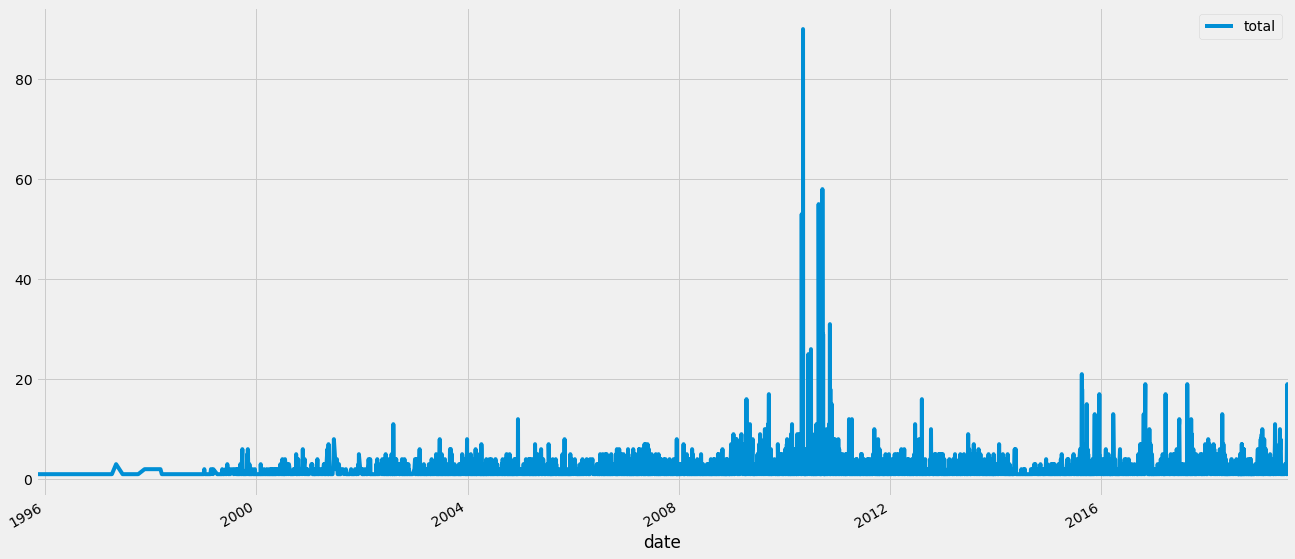

In [235]:
windows_frame.plot.line(x='date',y='total',figsize=(20,10));

In [236]:
linux_frame = date_frame[date_frame.platform.str.contains('linux') | date_frame.platform.str.contains('bsd') | date_frame.platform.str.contains('ux')]
linux_frame.head()

platform       date  total
974      bsd 1988-10-01      1
975      bsd 1996-10-25      1
976      bsd 1998-01-05      1
977      bsd 1999-07-02      1
978      bsd 1999-07-15      1

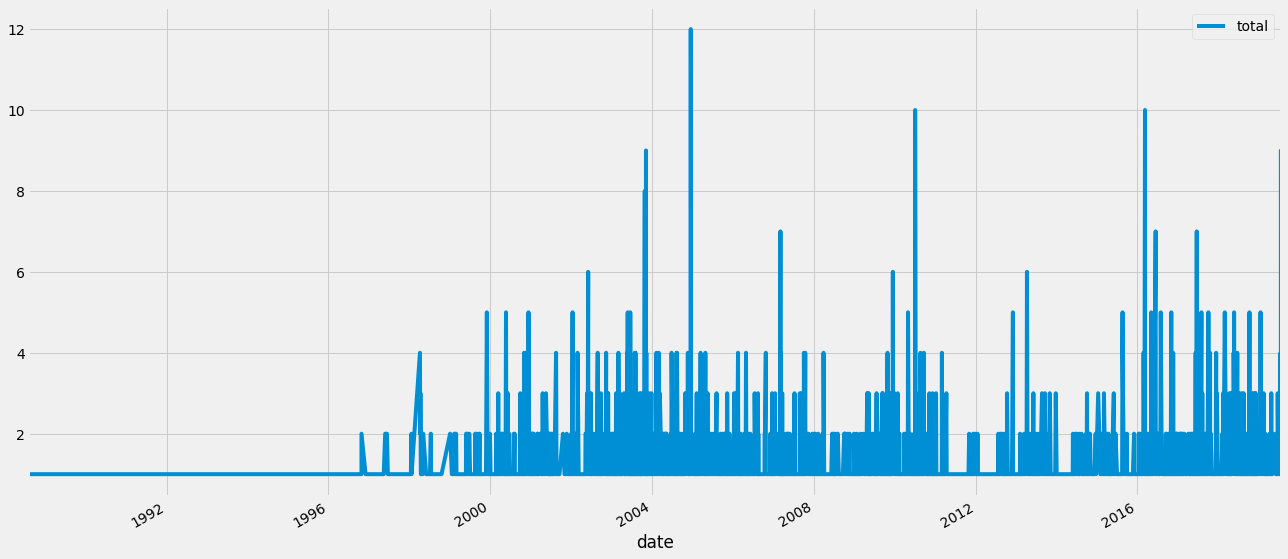

In [237]:
linux_frame.plot.line(x='date',y='total',figsize=(20,10));

In [238]:
hw_platforms = [ 'hardware','arm', 'osx_ppc', 'linux_mips',]
lang_platforms = [ 'php','cgi', 'asp', 'java', 'cfm', 'jsp', 'xml', 'ruby', 'python', 'aspx', 'perl', 'json', 'ashx', 'nodejs', 'lua']
os_platforms = ['windows','linux', 'hp-ux', 'solaris', 'novell', 'bsd', 'windows_x86', 'osx', 'android', 'ios', 'minix', 'qnx', 'freebsd', 'openbsd', 'netbsd_x86', 'aix', 'netware', 'unix', 'macos', 'windows_x86-64', 'irix', 'ultrix', 'beos', 'linux_x86-64', 'palm_os', 'linux_x86', 'freebsd_x86-64', 'freebsd_x86', 'tru64', 'plan9', 'immunix', 'unixware', 'atheos', 'solaris_x86', 'linux_sparc', 'solaris_sparc', 'bsd_x86',]

In [239]:
def platform_label(row):
    if row.platform in hw_platforms:
        return "hw"
    if row.platform in lang_platforms:
        return "lang"
    if row.platform in os_platforms:
        return "os"
    else:
        return "misc"

In [240]:
date_frame['platform_label'] = date_frame.apply(lambda row: platform_label(row), axis=1)
date_frame[date_frame['platform'].str.contains('windows')]
date_frame.head()

platform       date  total platform_label
0      aix 1991-05-01      1             os
1      aix 1993-02-03      1             os
2      aix 1994-04-02      1             os
3      aix 1996-11-24      1             os
4      aix 1996-12-02      1             os

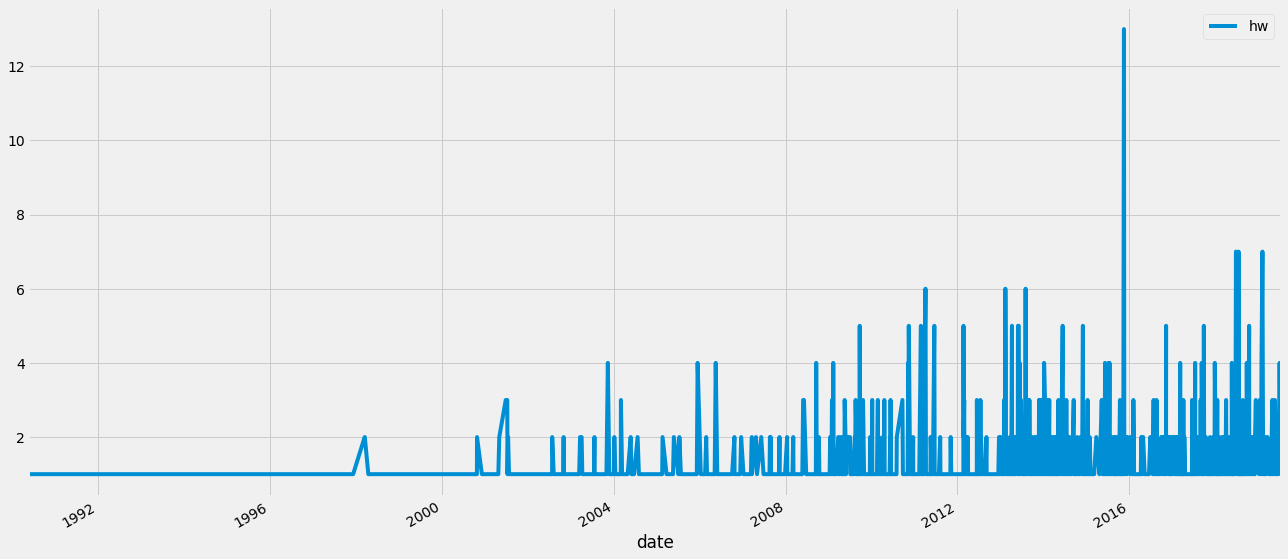

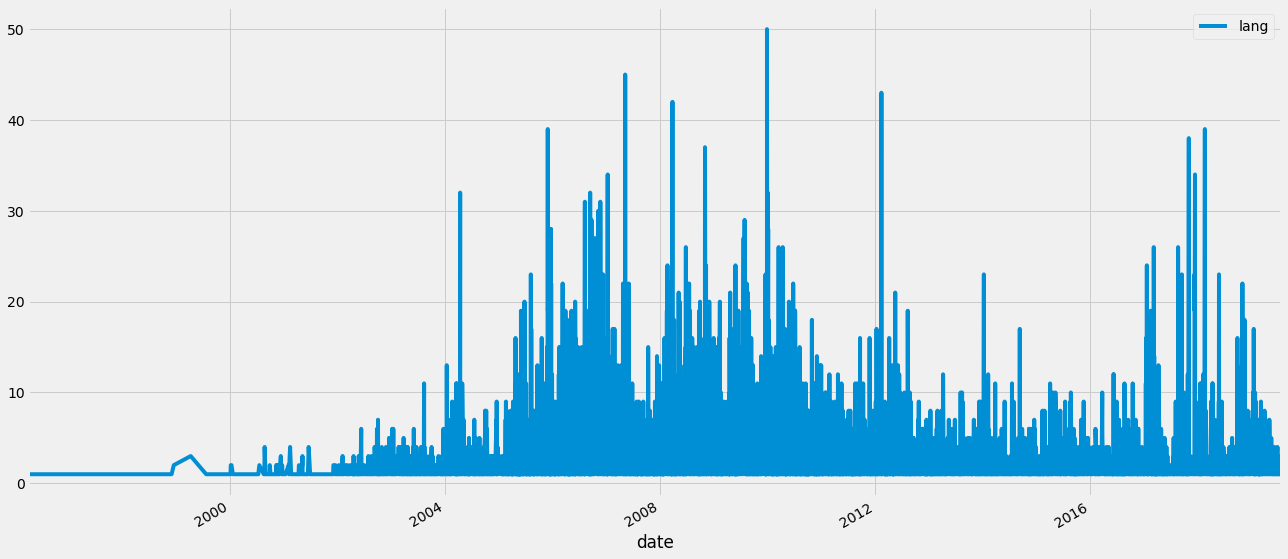

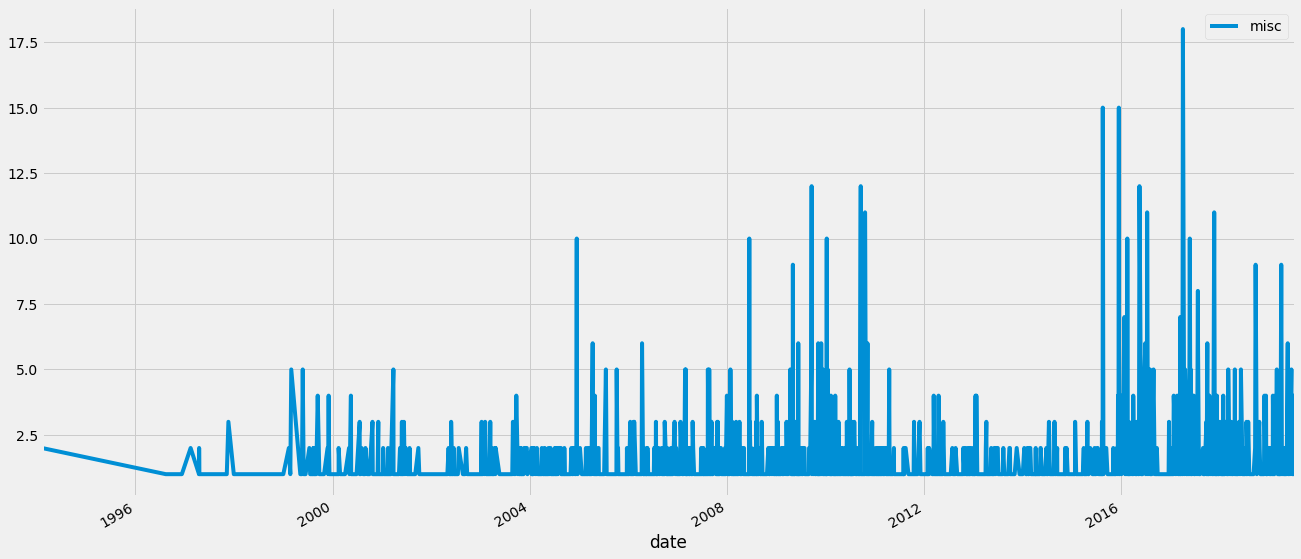

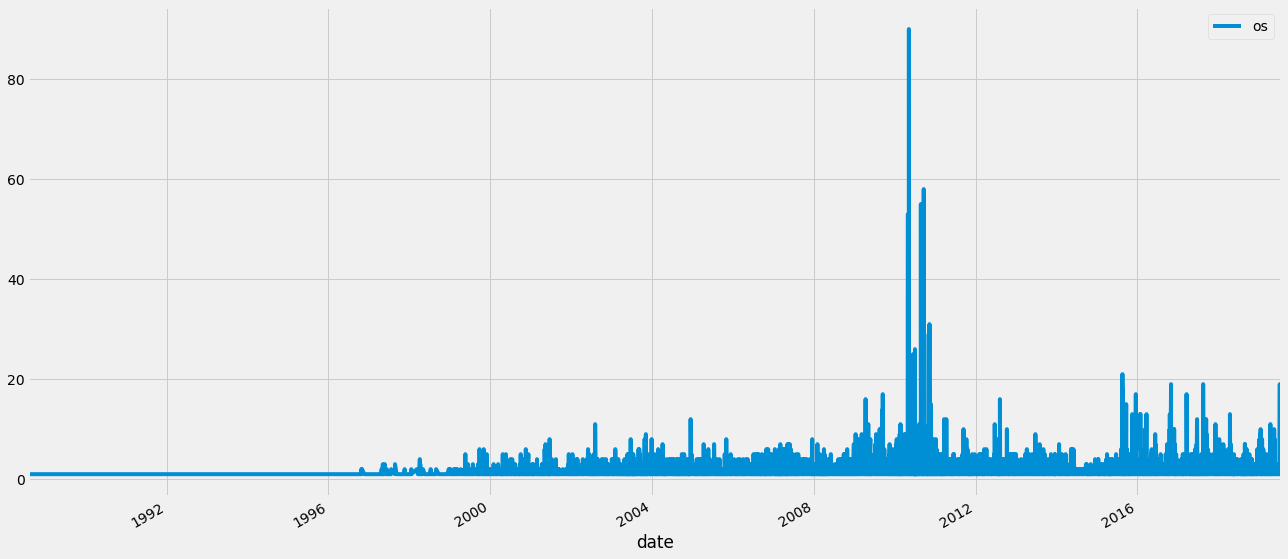

In [241]:
for key, grp in date_frame.groupby(['platform_label']):
    ax = grp.plot( kind='line', x='date', y='total', label=key,figsize=(20,10))

plots.legend(loc='best')
plots.show()

In [242]:
date_frame_sorted = date_frame.sort_values(['platform_label','date'])

In [243]:
date_frame_sorted['running_total'] = date_frame_sorted.groupby('platform_label').cumsum()
date_frame_sorted.head()

platform       date  total platform_label  running_total
1731  hardware 1990-05-19      1             hw              1
1732  hardware 1997-12-08      1             hw              2
1733  hardware 1998-03-16      2             hw              4
1734  hardware 1998-03-17      2             hw              6
1735  hardware 1998-04-16      1             hw              7

In [244]:
fig = px.line(date_frame_sorted, x="date", y="running_total", color='platform_label')
fig.show()

In [245]:
date_frame_sorted_plat = date_frame.sort_values(['platform','date'])

In [246]:
# new_df2 = date_frame.groupby(['platform','date']).sum().groupby('platform').total.cumsum().to_frame(name='total').reset_index()
date_frame_sorted_plat['running_total'] = date_frame_sorted_plat.groupby('platform').cumsum()

In [247]:
fig = px.line(date_frame_sorted_plat, x="date", y="running_total", color='platform')

fig.show()

In [248]:
platforms_list = date_frame_sorted_plat['platform'].unique().tolist()
buttons = []
for i, name in enumerate(platforms_list):
    visible = [False]*len(platforms_list)
    visible[i] = True
    buttons.append(
        dict(
            method='restyle',
            args=[{'visible': visible}],
            label=name
        ))
    
fig.layout = go.Layout(
    updatemenus=list([
        dict(
            x=-0.05,
            y=1,
            buttons=buttons,
            yanchor='top'
        )
    ]),)
fig.show()